LASSO REGRESSION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Lasso():
  def __init__(self,learning_rate,L1penalty,iterations):
    self.learning_rate=learning_rate
    self.L1penalty=L1penalty
    self.iterations=iterations

  def fit(self,X,Y):
    self.m, self.n = X.shape
    self.W=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range(self.iterations):
      self.update_weights()
    return self

  def update_weights(self):
    Y_pred=self.predict(self.X)
    dW=np.zeros(self.n)
    #calculate change in weight required
    for j in range(self.n):
      if self.W[j]>0:
        #plus penalty coeff
        #dott means matrix multiplication
        dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )

                         + self.L1penalty ) / self.m
      else:
        #minus penalty coeff
        dW[j]=( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )

                         - self.L1penalty ) / self.m

    db=-2*np.sum(self.Y-Y_pred)/self.m

    #pdate the weights
    self.W=self.W-self.learning_rate*dW
    self.b=self.W-self.learning_rate*db
    return self

  def predict(self,X):
    return X.dot(self.W)+ self.b




In [ ]:
def main():
  df=pd.read_csv('/content/drive/MyDrive/salary_data.csv')
  X=df.iloc[:,:-1].values
  Y=df.iloc[:,1].values
  X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1 / 3, random_state = 0 )
  model=Lasso( iterations = 1000, learning_rate = 0.01, L1penalty = 500 )
  model.fit( X_train, Y_train )
  Y_pred = model.predict( X_test )
  print( "Predicted values ", np.round( Y_pred[:3], 2 ) )
  print( "Real values	 ", Y_test[:3] )
  print( "Trained W	 ", np.round( model.W[0], 2 ) )
  print( "Trained b	 ", np.round( model.b, 2 ) )
  plt.scatter(X_test,Y_test,color='blue')
  plt.plot(X_test,Y_pred,color='red')
  plt.title('Salary vs Experience')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.show()





Predicted values  [ 29572.45 133433.14  60258.56]
Real values	  [ 37731. 122391.  57081.]
Trained W	  11802.35
Trained b	  [11868.92]


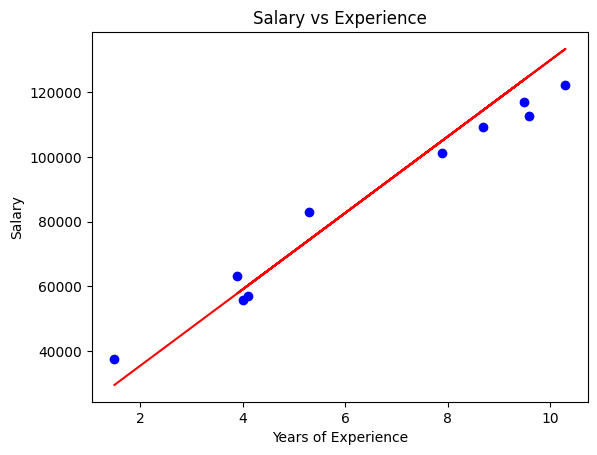

In [ ]:
if __name__=="__main__":
  main()

RIDGE REGRESSION

In [ ]:
class Ridge():
  def __init__(self,learning_rate,L2penalty,iterations):
    self.learning_rate=learning_rate
    self.L2penalty=L2penalty
    self.iterations=iterations

  def fit(self,X,Y):
    self.m, self.n = X.shape
    self.W=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range(self.iterations):
      self.update_weights()
    return self

  def update_weights(self):
    Y_pred=self.predict(self.X)
    dW=(-(2*(self.X.T).dot(self.Y-Y_pred))+(2*self.L2penalty*self.W))/self.m
    db=-2*np.sum(self.Y-Y_pred)/self.m
    #pdate the weights
    self.W=self.W-self.learning_rate*dW
    self.b=self.W-self.learning_rate*db
    return self

  def predict(self,X):
    return X.dot(self.W)+ self.b


In [ ]:
def main():
  df1=pd.read_csv('/content/drive/MyDrive/salary_data.csv')
  X=df1.iloc[:,:-1].values
  Y=df1.iloc[:,1].values
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)
  model=Ridge(iterations=300,learning_rate=0.01,L2penalty=1)
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print("Predicted values ",np.round(Y_pred[:3],2))
  print("Real values  ",Y_test[:3])
  print("Trained W  ",np.round(model.W[0],2))
  print("Trained b  ",np.round(model.b,2))

  plt.scatter(X_test,Y_test,color='blue')
  plt.plot(X_test,Y_pred,color='pink')
  plt.title("Salary vs Experience")
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.show()


Predicted values  [ 29530.69 133237.47  60171.33]
Real values   [ 37731. 122391.  57081.]
Trained W   11784.86
Trained b   [11853.4]


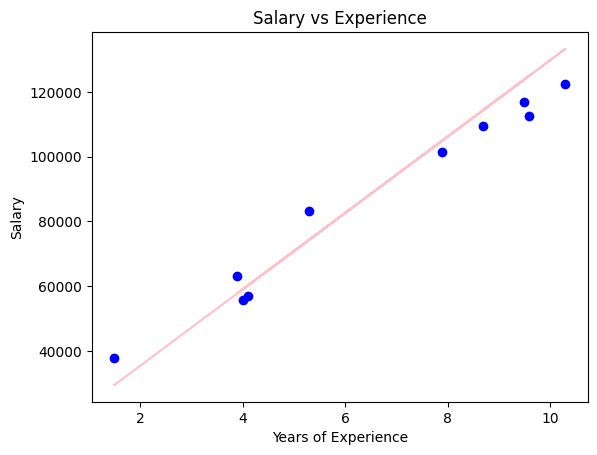

In [ ]:
if __name__=="__main__":
  main()